In [1]:
import torch
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
%matplotlib inline

### 作业5.1：利用Pytorch的自动微分框架来重新实现作业一 (12.16之前提交)

In [2]:
# def function1(x,y):
#     f=3* ((1-x)**2) * np.exp(-x**2-(y+1)**2)-10*(x/5-x**3-y**5)*np.exp(-x**2-y**2)-1.0/3*np.exp(-(x+1)**2-y**2)
#     return f

In [3]:
class Newlayer(torch.nn.Module):
    def __init__(self, init_x, init_y):
        super().__init__()
        # nn.Parameter用来告诉optimizer该权重是需要更新的 -- model.parameters()
        self.x =  torch.nn.Parameter(torch.full((1, 1),init_x,requires_grad=True))
        self.y =  torch.nn.Parameter(torch.full((1, 1),init_y,requires_grad=True))
    
    def forward(self):
        return 3* ((1-self.x)**2) * torch.exp(-self.x**2-(self.y+1)**2)\
    -10*(self.x/5-self.x**3-self.y**5)*torch.exp(-self.x**2-self.y**2)  \
    -1.0/3*torch.exp(-(self.x+1)**2-self.y**2)

In [4]:
# 初值列表
x0_list=[ [-0.200, -0.500],[-0.200, -0.200],[-0.500, -0.500] ]

迭代次数均为1000次,这次作业没有用GPU。
初始值为三个，分别是x0_list=[ [-0.200, -0.500],[-0.200, -0.200],[-0.500, -0.500] ]

第1次尝试迭代初始值为x0= -0.200,y0= -0.500 函数值为  3.101
第1次尝试迭代结束值为x0=  0.228,y0= -1.626 函数值为 -6.551

第2次尝试迭代初始值为x0= -0.200,y0= -0.200 函数值为  2.312
第2次尝试迭代结束值为x0=  0.297,y0=  0.318 函数值为 -0.065

第3次尝试迭代初始值为x0= -0.500,y0= -0.500 函数值为  3.551
第3次尝试迭代结束值为x0= -1.347,y0=  0.204 函数值为 -3.050



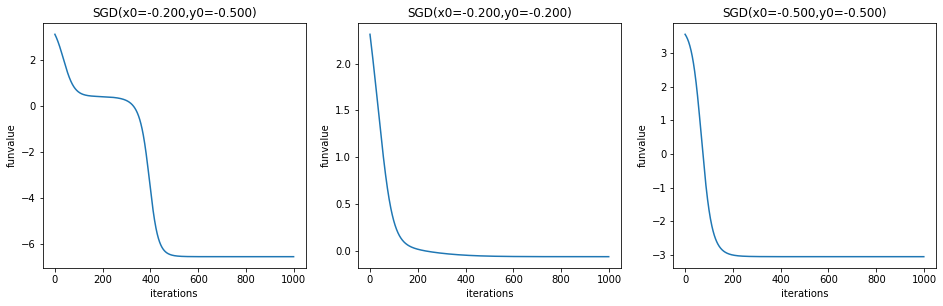

CPU times: user 4.34 s, sys: 308 ms, total: 4.64 s
Wall time: 4.57 s


In [6]:
%%time

print("迭代次数均为1000次,这次作业没有用GPU。")
print("初始值为三个，分别是x0_list=[ [-0.200, -0.500],[-0.200, -0.200],[-0.500, -0.500] ]")
print("")
plt.figure(figsize=(16, 4.5))
gs = gridspec.GridSpec(1, 3)



for index,(x0,y0)in enumerate(x0_list):      
    model=Newlayer(x0,y0)
    opt = torch.optim.SGD(model.parameters(), lr=1e-3)
    lossbox=[]
#     deltah=50

    for i in range(1000):
        opt.zero_grad()
        
        l=model.forward()
        l.backward()

        lossbox.append(l)   
        opt.step()
        
    if True:
        print( "第%d次尝试迭代初始值为x0=%7.3f,y0=%7.3f"%(index+1,x0,y0),"函数值为%7.3f"% (lossbox[0]) )
        print( "第%d次尝试迭代结束值为x0=%7.3f,y0=%7.3f"%(index+1,model.x,model.y),"函数值为%7.3f"% (lossbox[-1]) )
        ax = plt.subplot(gs[:,index])  
#         b_x=np.arange(len(lossbox))*deltah
        b_x=np.arange(len(lossbox))
        ax.plot(b_x,lossbox)
        ax.set_ylabel('funvalue')
        ax.set_xlabel('iterations')
        ax.set_title("SGD(x0=%0.3f,y0=%0.3f)" %(x0,y0))
        print("")
plt.show()